In [ ]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# if you are using google colab for this task you can mount your GoogleDrive as follows:
from google.colab import drive
drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

Mounted at /content/drive/


## Preparing the data

In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/MyDrive/Cats_and_Dogs/train'
val =   '/content/drive/MyDrive/Cats_and_Dogs/val'
test =  '/content/drive/MyDrive/Cats_and_Dogs/test'

# minibatch size
batch_size = 64
# train set size
nb_train_samples = len(os.listdir(train + '/cats')) + len(os.listdir(train + '/dogs'))
# validation set size
nb_validation_samples = len(os.listdir(val + '/cats')) + len(os.listdir(val + '/dogs'))
# test set size
nb_test_samples = len(os.listdir(test + '/cats')) + len(os.listdir(test + '/dogs'))

print(f"Train samples: {nb_train_samples}")
print(f"Validation samples: {nb_validation_samples}")
print(f"Test samples: {nb_test_samples}")

Train samples: 20000
Validation samples: 2490
Test samples: 2500


In [ ]:
# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# Task 1: CNN

In [ ]:
model = Sequential()
# 1: Convolutional
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
# 2: MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3: Convolutional
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# 4: MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5: Convolutional
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# 6: MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7: Flattening
model.add(Flatten())
# 8: Dense
model.add(Dense(32))
model.add(Activation('relu'))
# 9: Dropout
model.add(Dropout(0.5))
# 10: Dense
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 148, 148, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       591,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 615,521 (2.35 MB)

 Trainable params: 615,521 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 18412s 59s/step - accuracy: 0.6067 - loss: 0.6458 - val_accuracy: 0.7669 - val_loss: 0.5107
Epoch 2/15
  1/312 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7969 - loss: 0.5087

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 59s 190ms/step - accuracy: 0.7969 - loss: 0.5087 - val_accuracy: 0.7710 - val_loss: 0.5039
Epoch 3/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 99s 318ms/step - accuracy: 0.7533 - loss: 0.5100 - val_accuracy: 0.7545 - val_loss: 0.4889
Epoch 4/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7812 - loss: 0.4181 - val_accuracy: 0.7574 - val_loss: 0.4888
Epoch 5/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 98s 314ms/step - accuracy: 0.7846 - loss: 0.4584 - val_accuracy: 0.7973 - val_loss: 0.4311
Epoch 6/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8281 - loss: 0.3739 - val_accuracy: 0.7993 - val_loss: 0.4353
Epoch 7/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 142s 454ms/step - accuracy: 0.8099 - loss: 0.4121 - val_accuracy: 0.8166 - val_loss: 0.4065
Epoch 8/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7656 - loss: 0.5214 - val_accuracy: 0.8178 - val_loss: 0.4027
Epoch 9/15
312/312 ━━━━━━━━━━━━━━━━━━━━ 99s 316ms/step - accuracy: 0.8322 - loss: 0.3815 - val_a

In [ ]:
test_steps = nb_test_samples // batch_size
scores = model.evaluate(test_generator, steps=test_steps)
print(f"Accuracy on test data: {scores[1]*100:.2f}%")

39/39 ━━━━━━━━━━━━━━━━━━━━ 1994s 51s/step - accuracy: 0.8362 - loss: 0.3931
Accuracy on test data: 82.69%


Test accuracy 82.69% - not bad for CNN

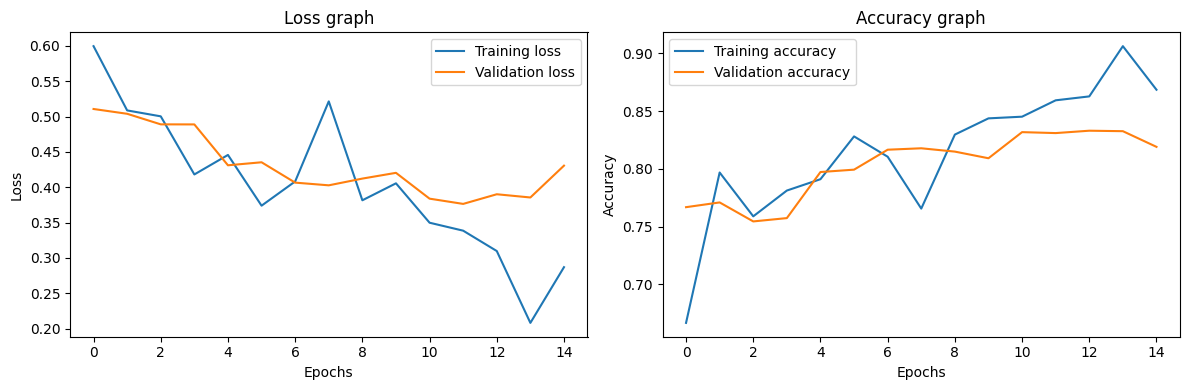

In [ ]:
plt.figure(figsize=(12, 4))

# Graph of Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graph of Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Task 2: VGG16 vs InceptionV3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Lambda
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Transfer Learning с VGG16
# loading the model
vgg16_net = VGG16(weights='imagenet',
                  include_top=False,    # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False     # clearly prescribe that we do NOT overload the network.
                                # Weights VGG16 in the process of learning will remain unchanged!
vgg16_net.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Creating the model above VGG16
vgg_model = Sequential()
vgg_model.add(vgg16_net)
# Flattening
vgg_model.add(Flatten())
# Dense
vgg_model.add(Dense(256))
 # Activatio ReLU
vgg_model.add(Activation('relu'))
# Dropout
vgg_model.add(Dropout(0.5))
# Dense
vgg_model.add(Dense(1))
vgg_model.add(Activation('sigmoid'))

vgg_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_97 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_98 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
vgg_model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
                  metrics=['accuracy'])

In [ ]:
epochs_vgg = 10
history_vgg = vgg_model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs_vgg,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=1
)

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 134s 374ms/step - accuracy: 0.6417 - loss: 0.6497 - val_accuracy: 0.8512 - val_loss: 0.3541
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8906 - loss: 0.2969 - val_accuracy: 0.8516 - val_loss: 0.3543
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 108s 345ms/step - accuracy: 0.8429 - loss: 0.3635 - val_accuracy: 0.8812 - val_loss: 0.2945
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9219 - loss: 0.2125 - val_accuracy: 0.8791 - val_loss: 0.2988
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 113s 361ms/step - accuracy: 0.8730 - loss: 0.3019 - val_accuracy: 0.8877 - val_loss: 0.2720
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8906 - loss: 0.2446 - val_accuracy: 0.8873 - val_loss: 0.2727
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 126s 350ms/step - accuracy: 0.8812 - loss: 0.2786 - val_accuracy: 0.8951 - val_loss: 0.2588
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8594 - loss: 0

In [ ]:
test_steps = nb_test_samples // batch_size
scores_vgg = vgg_model.evaluate(test_generator, steps=test_steps, verbose=1)
print(f"VGG16 Model - Test Accuracy: {scores_vgg[1]*100:.2f}%")

39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step - accuracy: 0.8983 - loss: 0.2412
VGG16 Model - Test Accuracy: 89.46%


Test accuracy 89.46% - better than CNN

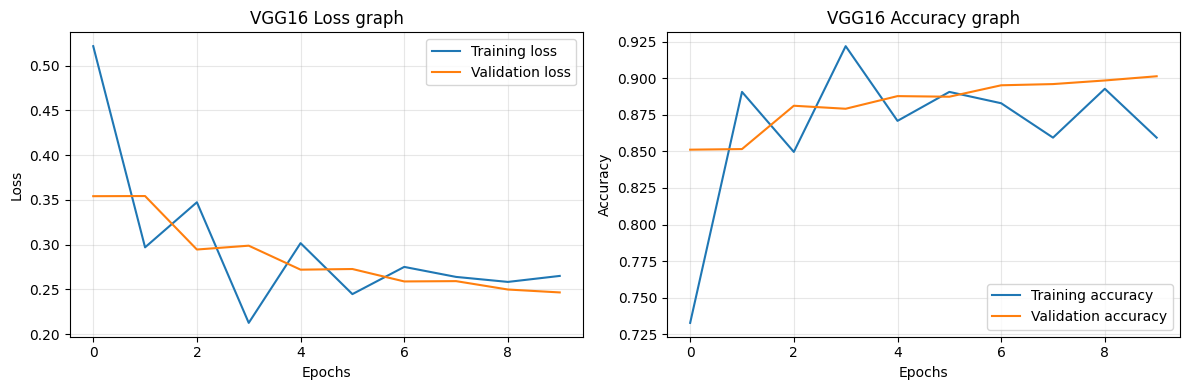

In [ ]:
plt.figure(figsize=(12, 4))

# Graph of Loss
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['loss'], label='Training loss')
plt.plot(history_vgg.history['val_loss'], label='Validation loss')
plt.title('VGG16 Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

# Graph of Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['accuracy'], label='Training accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation accuracy')
plt.title('VGG16 Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Transfer Learning with InceptionV3
# loading the model
inception_base = InceptionV3(weights='imagenet',
                       include_top=False,
                       input_shape=(150, 150, 3))
for layer in inception_base.layers:
  layer.trainable = False
inception_base.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Creating the model above InceptionV3
inception_model = Sequential()
inception_model.add(inception_base)
# Pooling
inception_model.add(GlobalAveragePooling2D())
# Dense
inception_model.add(Dense(512))
inception_model.add(Activation('relu'))
# Dense
inception_model.add(Dense(256))
inception_model.add(Activation('relu'))
inception_model.add(Dropout(0.5))
inception_model.add(Dense(1))
inception_model.add(Activation('sigmoid'))

inception_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_94 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_95 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_96 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
inception_model.compile(loss='binary_crossentropy',
                     optimizer=Adam(learning_rate=0.0001),
                     metrics=['accuracy'])

In [ ]:
# Training model
epochs_inception = 10
history_inception = inception_model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs_inception,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 3077s 9s/step - accuracy: 0.9059 - loss: 0.2259 - val_accuracy: 0.9613 - val_loss: 0.0932
Epoch 2/10
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.9375 - loss: 0.1879

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9375 - loss: 0.1879 - val_accuracy: 0.9618 - val_loss: 0.0945
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 105s 337ms/step - accuracy: 0.9651 - loss: 0.0922 - val_accuracy: 0.9634 - val_loss: 0.0823
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 1.0000 - loss: 0.0344 - val_accuracy: 0.9655 - val_loss: 0.0854
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 104s 331ms/step - accuracy: 0.9708 - loss: 0.0730 - val_accuracy: 0.9679 - val_loss: 0.0819
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 0.9667 - val_loss: 0.0842
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 102s 327ms/step - accuracy: 0.9733 - loss: 0.0657 - val_accuracy: 0.9667 - val_loss: 0.0850
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 1.0000 - loss: 0.0195 - val_accuracy: 0.9659 - val_loss: 0.0861
Epoch 9/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 142s 455ms/step - accuracy: 0.9795 - loss: 0.0537 - val

In [ ]:
test_steps = nb_test_samples // batch_size
scores_resnet = inception_model.evaluate(test_generator, steps=test_steps, verbose=1)
print(f"InceptionV3 Model - Test Accuracy: {scores_resnet[1]*100:.2f}%")

39/39 ━━━━━━━━━━━━━━━━━━━━ 554s 14s/step - accuracy: 0.9648 - loss: 0.0811
InceptionV3 Model - Test Accuracy: 96.27%


Test accuracy 96.27% - The best model

The graphs are a bit strange, although this situation cannot be called overfitting, because the gap between a and b is less than 5 percentage units.

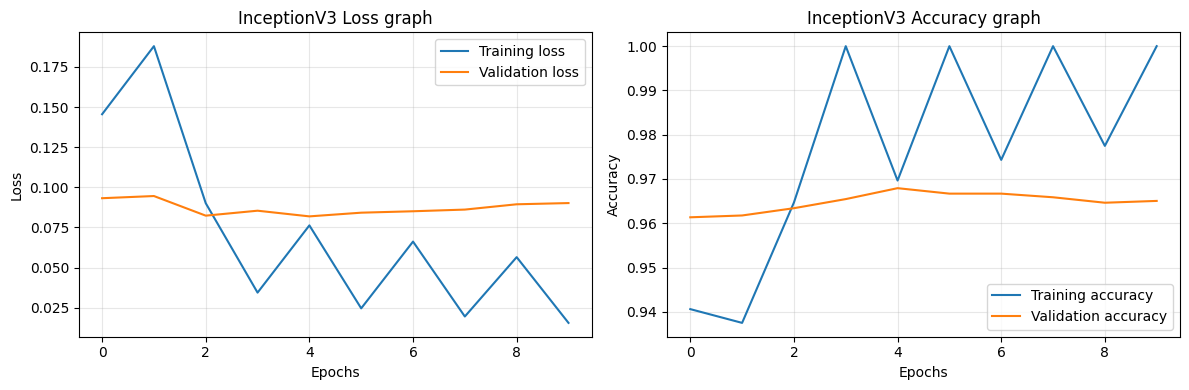

In [ ]:
plt.figure(figsize=(12, 4))

# Graph of Loss
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['loss'], label='Training loss')
plt.plot(history_inception.history['val_loss'], label='Validation loss')
plt.title('InceptionV3 Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

# Graph of Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['accuracy'], label='Training accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Validation accuracy')
plt.title('InceptionV3 Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Function of getting the best model

In [ ]:
def get_best_model(models_dict, test_generator, test_steps):

    accuracies = {}
    for name, model in models_dict.items():
        print(f"Evaluating {name}...")
        scores = model.evaluate(test_generator, steps=test_steps, verbose=0)
        accuracy = scores[1] * 100
        accuracies[name] = accuracy
        print(f"  Test Accuracy: {accuracy:.2f}%")

    best_model_name = max(accuracies, key=accuracies.get)
    best_model = models_dict[best_model_name]
    print(f"Best model: {best_model_name} ({accuracies[best_model_name]:.2f}%)")

    return best_model_name, best_model, accuracies

### Function of prediction on the custom picture of cat and dog

In [ ]:
def predict_cat_dog(model, img_path, img_size=(150, 150)):

    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array, verbose=0)[0][0]

    if prediction > 0.5:
        class_name = "dog"
        confidence = prediction * 100
    else:
        class_name = "cat"
        confidence = (1 - prediction) * 100

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f'Prediction: {class_name} ({confidence:.1f}% confidence)\nRaw score: {prediction:.4f}')
    plt.axis('off')
    plt.show()

    return prediction, class_name, confidence

Evaluating VGG16_Transfer...
  Test Accuracy: 89.42%
Evaluating InceptionV3_Transfer...
  Test Accuracy: 96.27%
Best model: InceptionV3_Transfer (96.27%)


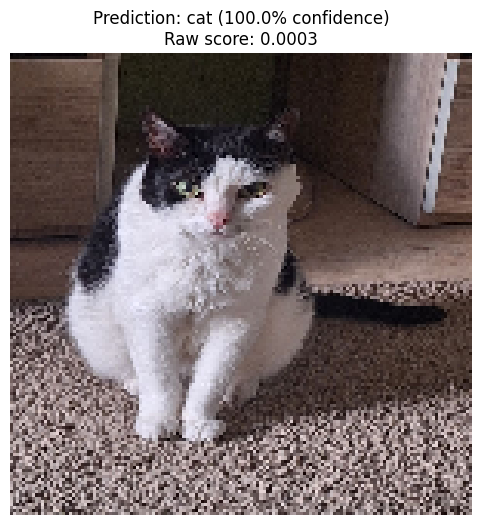

In [ ]:
models_dict = {
        'VGG16_Transfer': vgg_model,
        'InceptionV3_Transfer': inception_model
    }
best_name, best_model, all_accuracies = get_best_model(models_dict, test_generator, test_steps)

prediction, class_name, confidence = predict_cat_dog(best_model, '/content/drive/My Drive/cat_2.jpg')
img = mpimg.imread('/content/drive/My Drive/cat_2.jpg')



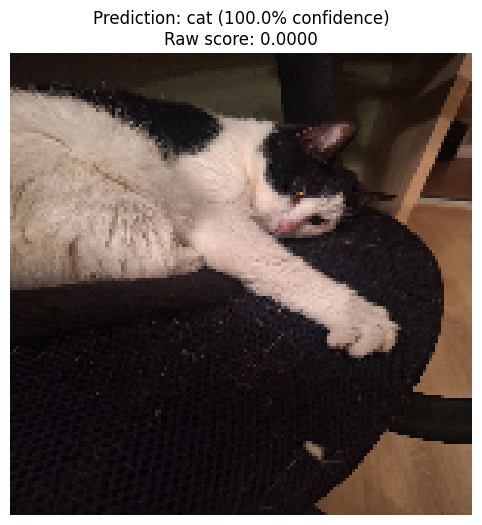

In [ ]:
prediction, class_name, confidence = predict_cat_dog(best_model, '/content/drive/My Drive/cat_1.jpg')


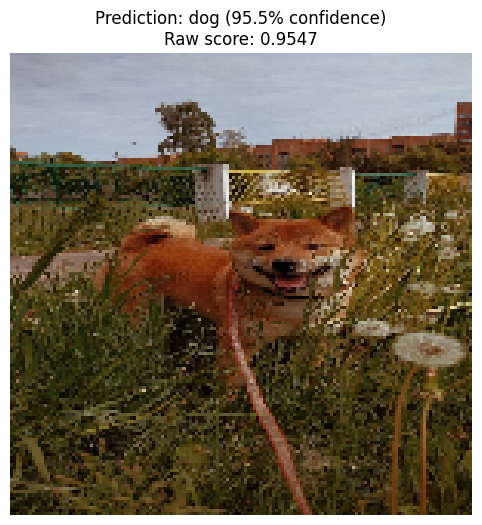

In [ ]:
prediction, class_name, confidence = predict_cat_dog(best_model, '/content/drive/My Drive/dog_1.jpg')
